In [11]:
from PIL import Image
import os
import glob
from math import log, floor
import numpy as np
import matplotlib.pyplot as plt
from math import tan, sin, cos, pi, atan, radians, degrees

import skimage
from PIL import Image
from open3d import *

from pathlib import Path
from pinhole_utils import *

In [15]:
depth_arrays = glob.glob('../data/munit_dataset_trainA_depth_v2/*.npy')

In [16]:
#camera vertical field of view
FOV = 120
#percentage of the image you want to mask
threshold = 0.35
#where to save the images
savepath = '../data/munit_dataset_trainA_height/'

In [ ]:
for elem in depth_arrays:
    if os.path.basename(elem)[:3] == 'gsv':
        print(elem)
        depth = np.load(elem)
        H,W = depth.shape
        Kc = get_intrinsic_matrix_vFOV(H,W,FOV)
        inv_Kc = np.linalg.inv(Kc)
        heights = get_3D_coords(depth, inv_Kc, pitch = 0)[:,1]
        thresh = np.quantile(heights, threshold)
        index = np.where((heights< thresh).reshape(H, W))
        test = np.zeros((H, W))
        test[index[0], index[1]] = 255     
        Image.fromarray(test).convert('L').save(savepath + os.path.basename(elem)[:10]+'.jpg')

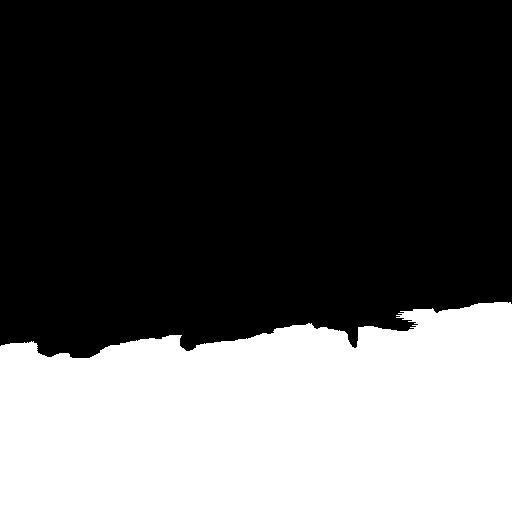

In [22]:
Image.open('../data/munit_dataset_trainA_height/gsv_000389.jpg')

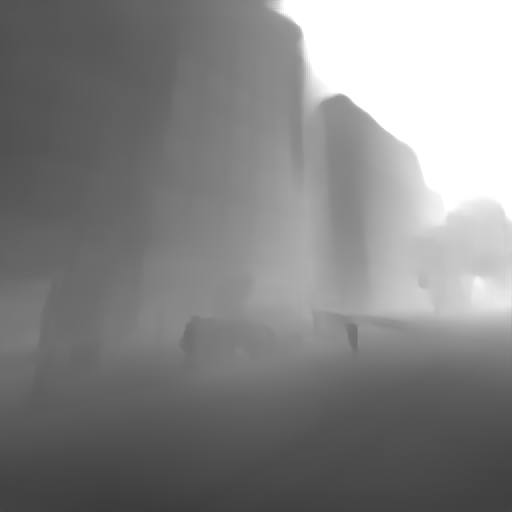

In [21]:
Image.fromarray(255*np.load('../data/munit_dataset_trainA_depth_v2/gsv_000389_depth.npy')).convert('L')